In [1]:
import pandas as pd
import numpy as np

In [5]:
target_coord = pd.read_csv("target_station.csv")
target_city={}
for i in range(len(target_coord)):
    target_city[i] = [target_coord.iloc[i]['city'],target_coord.iloc[i]['lat'],target_coord.iloc[i]['lon'],[False,False,False,False]]

In [6]:
pga_times_pre = np.random.choice(a=[False, True], size=(45,5))

In [8]:
flag=False
for i in range(len(target_coord)):
    if(set(target_city[i][-1]) == set(pga_times_pre[i])):
        flag = True
    else:
        target_city[i] = [target_coord.iloc[i]['city'],target_coord.iloc[i]['lat'],target_coord.iloc[i]['lon'],pga_times_pre[i]]
    

array([[ True,  True, False, False, False, False, False,  True, False,
        False, False,  True, False, False, False, False, False,  True,
         True, False, False, False,  True,  True,  True,  True, False,
        False, False,  True,  True,  True,  True, False, False, False,
        False, False, False, False,  True, False, False, False, False],
       [ True, False,  True,  True,  True, False,  True,  True,  True,
         True,  True, False, False,  True, False, False,  True,  True,
        False, False, False,  True, False,  True, False, False, False,
         True, False, False, False,  True,  True,  True,  True,  True,
         True,  True, False, False,  True, False, False, False,  True],
       [ True,  True, False, False,  True, False,  True,  True, False,
         True, False, False, False, False,  True,  True,  True,  True,
         True, False,  True,  True, False,  True,  True, False,  True,
        False, False, False, False,  True, False, False, False, False,
    

In [51]:
#lat 緯度
#lon 經度
from staticmap import StaticMap, CircleMarker, Polygon, Line
import requests
def plot_taiwan_roation(target_city,name):
    
    m = StaticMap(1000, 1000)
    
    for index in target_city:
        sta = target_city[index]
        try:
            max_pga_level = [index for (index, item) in enumerate(sta[-1]) if item == 1][-1]
        except:
            max_pga_level=False
        
        if(max_pga_level):
            if(max_pga_level==0):
                color="#00FFFF"
            elif(max_pga_level==1):
                color="#0000FF"
            elif(max_pga_level==1):
                color='#FFFF00'
            else:
                color="#E60000"
                
            marker = CircleMarker([sta[1], sta[2]], color, 10) 
            m.add_marker(marker)
        
    
    m.add_marker(CircleMarker((120, 25), '#00000000', 12))
    m.add_marker(CircleMarker((123, 25), '#00000000', 12))
    m.add_marker(CircleMarker((120, 22), '#00000000', 12))
    m.add_marker(CircleMarker((123, 22), '#00000000', 12))

    image = m.render(zoom=8)
    image.save(f'taiwan_{name}.png')
    
# send the picking info to Line notify
def plot_notify(name):
    token = "uAUGiQLwsDHPjahFHAPWEmTztOFipJIB4O8bmhaFlLm"
    
    msg = name.split('/')[-1].split('.')[0] 
    message = f"Prediction: {msg}\n"

    try:
        url = "https://notify-api.line.me/api/notify"
        headers = {
            'Authorization': f'Bearer {token}'
        }
        payload = {
            'message': message,
        }
        image = {
            'imageFile': open(name, 'rb'),
        }
        response = requests.request(
            "POST",
            url,
            headers=headers,
            data=payload,
            files=image,
        )
        if response.status_code == 200:
            print(f"Success waveform prediction -> {response.text}")
    except Exception as e:
        print(e)

In [52]:
plot_taiwan_roation(target_city,"test")
# plot_notify(f'taiwan_test.png')

['臺北市政府', 121.564, 25.037, [False, False, False, False]]
['新北市政府', 121.466, 25.012, [False, False, False, False]]
['淡水區公所', 121.444, 25.187, [False, False, False, False]]
['坪林區公所', 121.712, 24.936, [False, False, False, False]]
['基隆市政府', 121.744, 25.132, [False, False, False, False]]
['桃園市政府', 121.301, 24.993, [False, False, False, False]]
['楊梅區公所', 121.144, 24.913, [False, False, False, False]]
['復興區公所', 121.351, 24.815, [False, False, False, False]]
['新竹市政府', 120.969, 24.807, [False, False, False, False]]
['新竹縣政府', 121.013, 24.827, [False, False, False, False]]
['竹東鎮公所', 121.092, 24.737, [False, False, False, False]]
['苗栗縣政府', 120.821, 24.565, [False, False, False, False]]
['卓蘭鎮公所', 120.824, 24.313, [False, False, False, False]]
['泰安鄉公所', 120.908, 24.447, [False, False, False, False]]
['臺中市政府', 120.647, 24.162, [False, False, False, False]]
['后里區公所', 120.711, 24.305, [False, False, False, False]]
['和平區公所', 120.884, 24.175, [False, False, False, False]]
['南投縣政府', 120.691, 23.903, [Fal

: 

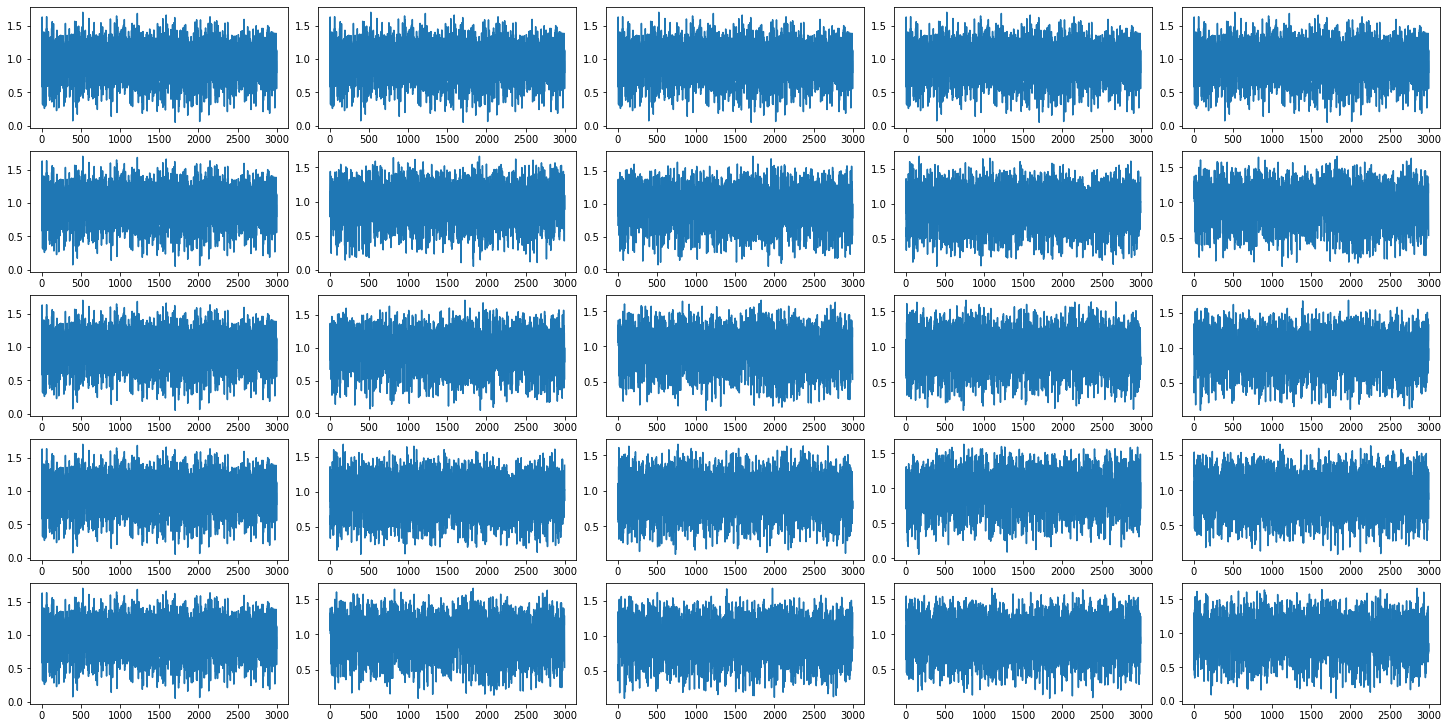

In [14]:
import matplotlib.pyplot as plt      # v 3.3.2
waves = np.random.rand(25,3000,3)
def plot_wave(waves):
    fig, ax = plt.subplots(5,5,constrained_layout = True,figsize=(20, 10))
    for i in range(5):
        for j in range(5):
            wave = np.sqrt(waves[i*j,:,0]**2+waves[i*j,:,1]**2+waves[i*j,:,2]**2)
            ax[i,j].plot(wave)
    plt.savefig('foo.png')
plot_wave(waves)

(25, 3000, 3)